In [37]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [3]:
glass = pd.read_csv("C:/Python/Cases/Glass_Identification/Glass.csv")
y = glass['Type']
X = glass.drop('Type', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25,
                                                    stratify=y)

In [4]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict( X_test )
print( classification_report(y_test, y_pred) )

                                      precision    recall  f1-score   support

    building_windows_float_processed       0.55      0.76      0.64        21
building_windows_non_float_processed       0.65      0.57      0.60        23
                          containers       0.50      0.50      0.50         4
                           headlamps       1.00      0.67      0.80         9
                           tableware       0.75      1.00      0.86         3
     vehicle_windows_float_processed       0.50      0.20      0.29         5

                            accuracy                           0.63        65
                           macro avg       0.66      0.62      0.61        65
                        weighted avg       0.65      0.63      0.62        65



In [5]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred = qda.predict( X_test )
print( classification_report(y_test, y_pred) )

                                      precision    recall  f1-score   support

    building_windows_float_processed       0.47      0.76      0.58        21
building_windows_non_float_processed       0.44      0.35      0.39        23
                          containers       0.00      0.00      0.00         4
                           headlamps       0.62      0.89      0.73         9
                           tableware       0.00      0.00      0.00         3
     vehicle_windows_float_processed       0.00      0.00      0.00         5

                            accuracy                           0.49        65
                           macro avg       0.26      0.33      0.28        65
                        weighted avg       0.39      0.49      0.43        65



c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 3 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warning

In [6]:
vehicle = pd.read_csv("C:/Python/Cases/Vehicle_Silhouettes/Vehicle.csv")
X = vehicle.drop('Class', axis=1)
y = vehicle['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25,
                                                    stratify=y)

In [7]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict( X_test )
print( classification_report(y_test, y_pred) )

              precision    recall  f1-score   support

         bus       0.93      0.95      0.94        65
        opel       0.68      0.67      0.68        64
        saab       0.69      0.69      0.69        65
         van       0.95      0.93      0.94        60

    accuracy                           0.81       254
   macro avg       0.81      0.81      0.81       254
weighted avg       0.81      0.81      0.81       254



In [8]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred = qda.predict( X_test )
print( classification_report(y_test, y_pred) )

              precision    recall  f1-score   support

         bus       0.98      0.92      0.95        65
        opel       0.75      0.77      0.76        64
        saab       0.77      0.75      0.76        65
         van       0.92      0.98      0.95        60

    accuracy                           0.85       254
   macro avg       0.86      0.86      0.86       254
weighted avg       0.86      0.85      0.85       254



#### Iris

In [10]:
iris = pd.read_csv("C:/Python/Datasets/iris.csv")
y = iris['Species']
X = iris.drop('Species', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25,
                                                    stratify=y)

In [11]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict( X_test )
print( classification_report(y_test, y_pred) )

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.93      0.93      0.93        15
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



### LDA Transformation

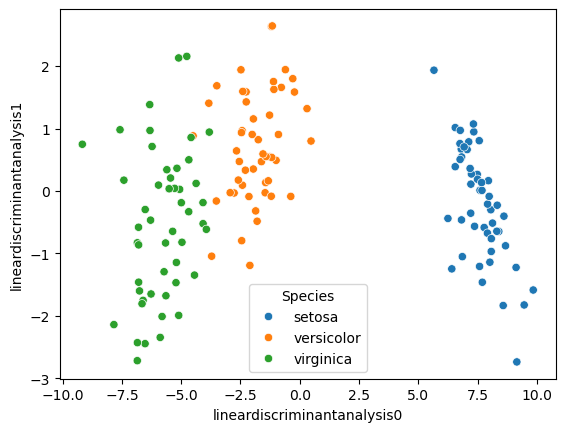

In [21]:
lda = LinearDiscriminantAnalysis().set_output(transform='pandas')
X_lda = lda.fit_transform(X, y)
X_lda['Species'] = iris['Species']
sns.scatterplot(data=X_lda, x='lineardiscriminantanalysis0',y='lineardiscriminantanalysis1',
                hue='Species')
plt.show()

In [22]:
X_lda

,lineardiscriminantanalysis0,lineardiscriminantanalysis1,Species
0,8.061800,-0.300421,setosa
1,7.128688,0.786660,setosa
2,7.489828,0.265384,setosa
3,6.813201,0.670631,setosa
4,8.132309,-0.514463,setosa
...,...,...,...
145,-5.645003,-1.677717,virginica
146,-5.179565,0.363475,virginica
147,-4.967741,-0.821141,virginica
148,-5.886145,-2.345091,virginica


Unsupervised Learning usage of LDA

In [23]:
glass = pd.read_csv("C:/Python/Cases/Glass_Identification/Glass.csv")
y = glass['Type']
X = glass.drop('Type', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25,
                                                    stratify=y)

In [26]:
lda = LinearDiscriminantAnalysis().set_output(transform='pandas')
X_trn_lda = lda.fit_transform(X_train, y_train)
X_tst_lda = lda.transform(X_test)

In [27]:
lr = LogisticRegression()
lr.fit(X_trn_lda, y_train)
y_pred = lr.predict(X_tst_lda)
print( classification_report(y_test, y_pred) )

                                      precision    recall  f1-score   support

    building_windows_float_processed       0.58      0.71      0.64        21
building_windows_non_float_processed       0.67      0.61      0.64        23
                          containers       0.50      0.50      0.50         4
                           headlamps       1.00      0.89      0.94         9
                           tableware       1.00      0.67      0.80         3
     vehicle_windows_float_processed       0.25      0.20      0.22         5

                            accuracy                           0.65        65
                           macro avg       0.67      0.60      0.62        65
                        weighted avg       0.66      0.65      0.65        65



In [32]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('LDA',lda),('LR',lr)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print( classification_report(y_test, y_pred) )

                                      precision    recall  f1-score   support

    building_windows_float_processed       0.58      0.71      0.64        21
building_windows_non_float_processed       0.67      0.61      0.64        23
                          containers       0.50      0.50      0.50         4
                           headlamps       1.00      0.89      0.94         9
                           tableware       1.00      0.67      0.80         3
     vehicle_windows_float_processed       0.25      0.20      0.22         5

                            accuracy                           0.65        65
                           macro avg       0.67      0.60      0.62        65
                        weighted avg       0.66      0.65      0.65        65



In [38]:
knn = KNeighborsClassifier()
pipe = Pipeline([('LDA',lda),('MODEL',knn)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print( classification_report(y_test, y_pred) )

                                      precision    recall  f1-score   support

    building_windows_float_processed       0.58      0.67      0.62        21
building_windows_non_float_processed       0.58      0.65      0.61        23
                          containers       0.67      0.50      0.57         4
                           headlamps       0.86      0.67      0.75         9
                           tableware       1.00      0.67      0.80         3
     vehicle_windows_float_processed       0.67      0.40      0.50         5

                            accuracy                           0.63        65
                           macro avg       0.73      0.59      0.64        65
                        weighted avg       0.65      0.63      0.63        65

